In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def gen_points(n, d, mode='lecture'):
    '''
    generate points with certain shape that are uniformly distributed in the unit ball with one of three methods.
    ''' 
    if 'naive' == mode:
        return gen_points_naive(n, d)
        
    if 'lecture' == mode:
        return gen_points_lecture(n, d)
    
    if 'sphere' == mode:
        return gen_points_sphere(n, d)
    
    
def gen_points_naive(n, d):
    '''
    generate n points sequentially by sampling from [-1, 1]^d and discarding if norm(x)>1
    ~ based on: slide 47 in the lecture.
    '''
    points  = np.empty((n,d))
    nPoints = 0
    while(n > nPoints):
        point = np.random.uniform(low=-1, high=1, size=(1,d)) # n points sampled uniformly from [-1, 1]^d
        if np.linalg.norm(point) < 1:                         # check if norm < 1
            points[nPoints] = point                           # if so, add to points  
            nPoints += 1

    return points


def gen_points_lecture(n, d):
    '''
    generate n points from a d dimensional normal distribution and project them to the unit sphere. Asign each point a radius sampled
    between 0 and 1 with density p(r) = d*r^(d-1) (i.e. use the exponential distribution with lambda = d).
    ~ based on: slide 53 in the lecture.
    '''
    points     = np.random.normal(loc=0, scale=1, size=(n,d))  # n points sampled from a d-dimensional normal distribution  
    pointsNorm = np.linalg.norm(points, axis=1)[:, np.newaxis] # L2 norm of points along second axis (dimension)
    radius     = np.random.power(a=d, size=(n,1))              # n radii sampled from [0,1] with density d*radius^(d-1) i.e. exponential distribution with exponent d

    return radius * points / pointsNorm
    
    
def gen_points_sphere(n, d):
    '''
    generate n points from a d+2 dimensional normal distribution and project them to the unit sphere. Return any d dimensional projection.
    ~ based on: Harman, R. & Lacko, V. (2010). On decompositional algorithms for uniform sampling fromn-spheres and n-balls.
    '''
    points       = np.random.normal(loc=0, scale=1, size=(n, d+2))
    pointsNorm   = np.linalg.norm(points, axis=1)[:, np.newaxis]

    return (points / pointsNorm)[:, :-2]

The generate_points function takes three arguments. The number of points n, the dimension d and a string to specify the method (default: method from lecture). In the following we visualize 100.000 2D points uniformly distributed in $B^{2}$ and 10.000 3D points in $B^{3}$, both with the default mode 'lecture'. 

In [3]:
pointsBall = gen_points(100000, 2)
alpha = 0.01

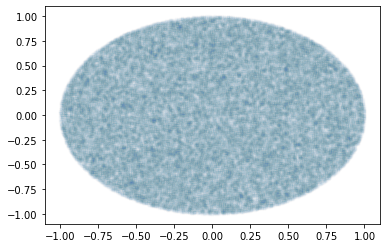

In [4]:
plt.plot(pointsBall[:, 0], pointsBall[:, 1], '.', alpha=alpha)
plt.show()

In [5]:
pointsBall = gen_points(10000, 3)
alpha = 0.05

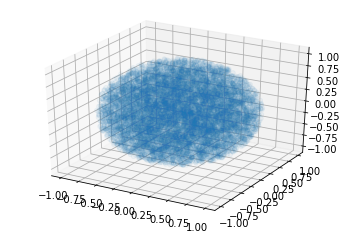

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pointsBall[:, 0], pointsBall[:, 1], pointsBall[:, 2], alpha=alpha)